# Zadanie 7
Wczytaj zbiór danych zawierający dane o wynikach testów psychologicznych. Zastosuj różne
techniki redukcji wymiarowości, takie jak PCA, NMF i t-SNE. Porównaj wyniki redukcji wymiarowości na wykresie, aby zobaczyć, która technika najlepiej separuje dane w nowej przestrzeni.

In [1]:
import  pandas as pd
import  numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.decomposition import NMF
from sklearn.preprocessing import MinMaxScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [2]:
df = pd.read_csv('data/data-final.csv', sep='\t')
df = df.dropna(how='all')
rows_with_none = df[df.apply(lambda row: row.astype(str).str.contains('NONE').any(), axis=1)]
df = df.drop(rows_with_none.index)
df

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4,1,5,2,5,1,5,2,4,1,...,2016-03-03 02:01:01,768,1024,9,234,6,1,GB,51.5448,0.1991
1,3,5,3,4,3,3,2,5,1,5,...,2016-03-03 02:01:20,1360,768,12,179,11,1,MY,3.1698,101.706
2,2,3,4,4,3,2,1,3,2,5,...,2016-03-03 02:01:56,1366,768,3,186,7,1,GB,54.9119,-1.3833
3,2,2,2,3,4,2,2,4,1,4,...,2016-03-03 02:02:02,1920,1200,186,219,7,1,GB,51.75,-1.25
4,3,3,3,3,5,3,3,5,3,4,...,2016-03-03 02:02:57,1366,768,8,315,17,2,KE,1.0,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18895,4,4,4,3,1,1,5,5,1,5,...,2016-03-17 09:16:12,1440,960,2,315,3,52,US,25.6046,-80.4997
18896,1,5,1,4,2,4,1,5,1,5,...,2016-03-17 09:17:25,1600,900,198,455,15,1,SG,1.2931,103.8558
18897,3,1,4,2,4,1,5,2,5,2,...,2016-03-17 09:17:45,1440,900,13,218,13,20,US,39.0181,-91.8971
18898,4,0,3,3,3,2,3,3,3,3,...,2016-03-17 09:18:38,1366,768,45,594,19,276,US,37.5155,-121.8962


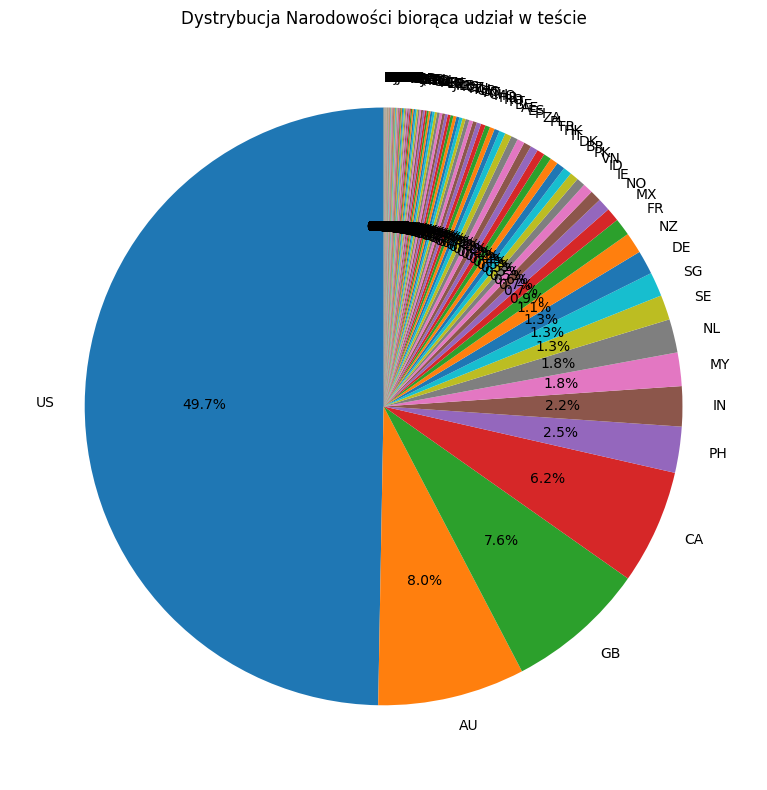

In [3]:
# Tworzenie wykresu kołowego
plt.figure(figsize=(8, 8))
plt.pie(df['country'].value_counts(), labels=df['country'].value_counts().index, autopct='%1.1f%%', startangle=90)
plt.title('Dystrybucja Narodowości biorąca udział w teście')
plt.tight_layout()
plt.show()

In [4]:
# Stosowanie PCA
pca = PCA(n_components=2)
# Dopasowanie PCA do danych i transformacja
test_data = df.loc[:, (df.columns != 'country') & (df.columns != 'dateload')]
X_pca = pca.fit_transform(test_data)
# Wyświetlenie nowych danych po zastosowaniu PCA
print("Nowe dane po zastosowaniu PCA:")
print(X_pca)

Nowe dane po zastosowaniu PCA:
[[-74420.88790927 -14878.24078269]
 [-76740.22361648 -17350.65373396]
 [-79371.31995429 -18281.41947587]
 ...
 [-77668.01675902 -15571.40200843]
 [-71747.18845727  39927.38637496]
 [-78373.03148993 -10069.72015068]]


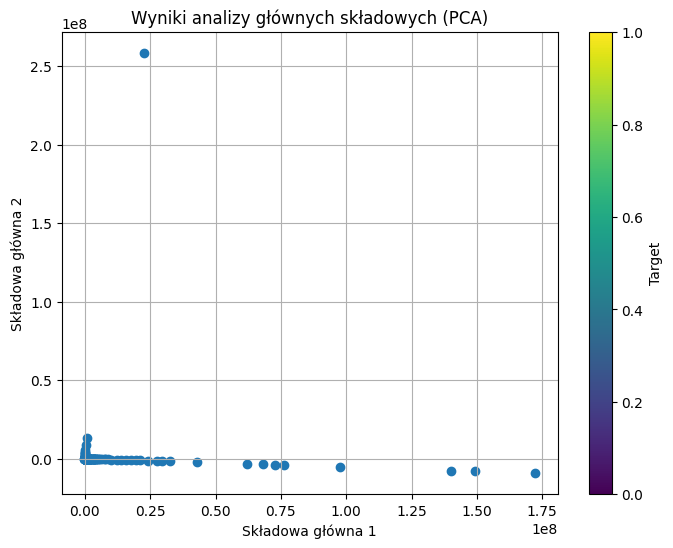

In [5]:
# Wykres wyników PCA
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.title('Wyniki analizy głównych składowych (PCA)')
plt.xlabel('Składowa główna 1')
plt.ylabel('Składowa główna 2')
plt.grid(True)
# Dodanie legendy z etykietami klas
plt.colorbar(scatter, label='Target')
plt.show()

In [ ]:
# Stosowanie TSNE
tsne = TSNE(n_components=2)
# Dopasowanie PCA do danych i transformacja
test_data = df.loc[:, (df.columns != 'country') & (df.columns != 'dateload')]
X_tsne = tsne.fit_transform(test_data)
# Wyświetlenie nowych danych po zastosowaniu TSNE
print("Nowe dane po zastosowaniu TSNE:")
print(X_tsne)

In [ ]:
# Wykres wyników TSNE
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
plt.title('Wyniki analizy głównych składowych (TSNE)')
plt.xlabel('Składowa główna 1')
plt.ylabel('Składowa główna 2')
plt.grid(True)
plt.show()

In [ ]:
nmf_model = NMF(n_components=2) 
scaler = MinMaxScaler()
test_data = scaler.fit_transform(test_data)
print(test_data)
nmf_model.fit(test_data)
W = nmf_model.transform(test_data) 
H = nmf_model.components_ 

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(W, cmap='hsv', aspect='auto')
plt.title('Macierz bazowa (W)')
plt.xlabel('Składowe')
plt.ylabel('Próbki')
plt.subplot(1, 2, 2)
plt.imshow(H, cmap='hsv', aspect='auto')
plt.title('Macierz wagowa (H)')
plt.xlabel('Cechy')
plt.ylabel('Składowe')
plt.tight_layout()
plt.show()

# Wnioski
Moim zdaniem żadna z metod nie daje nam zadowalającego podziału na grupy albo brakuje mi wiedzy o danych aby poprawnie wyniki które otrzymaliśmy zinterpretować.